# Read an `sgram` `.fspec` file with EspsSgramReader

In [1]:
from espspy.readers import EspsSgramReader
import matplotlib.pyplot as plt
%matplotlib inline

Create a reader object by providing a filename.

In [2]:
fspecfile = 'SN206_COMMA_01.fspec'
frdr = EspsSgramReader(fspecfile)

Once the reader is created you use the `sgram` attribute to access the spectrogram data. By default all spectrogram data is returned.

In [3]:
alldata = frdr.sgram
alldata

array([[52, 33, 36, ..., 55, 58, 54],
       [53, 41, 38, ..., 48, 58, 53],
       [56, 50, 50, ..., 54, 57, 51],
       ..., 
       [35, 26, 31, ..., 29, 33, 31],
       [39, 34, 26, ..., 26, 31, 26],
       [40, 36, 21, ..., 26, 31, 27]], dtype=uint8)

Use the `set_data_view()` method to set time and frequency limits on the data returned by subsequent access of the `sgram` attribute. The `t1` and `hz1` parameters are used to specify the minimum time and frequency limits of the spectrogram (0.0 if not specified); the `t2` and `hz2` parameters specify the upper limits (maximum time/frequency if not specified).

The `times` and `bin_hz` attributes retrieve the time points and bin frequencies for the current data_view.

In [4]:
# Set the ranges returned by sgram property.
frdr.set_data_view(t1=1.4, t2=3.0, hz2=8000)
print('min time: ', frdr.times.min())
print('max time: ', frdr.times.max())
print('min freq: ', frdr.bin_hz.min())
print('max freq: ', frdr.bin_hz.max())

min time:  1.40081632653
max time:  2.99718820862
min freq:  0.0
max freq:  7924.21875


The matplotlib `imshow()` function is one way to display the spectrogram. Use the reader's `data_view_extent` attribute to define the extent of the spectrogram plot. This attribute is a four-valued list that defines the time range and frequency range of the spectrogram. (The limits are extended half an analysis frame beyond the min/max time limits and half a frequency bin beyond the frequency limits of the current data_view.)

data_view_extent:  [1.3998185941043082, 3.0001814058956917, -43.06640625, 8053.41796875]


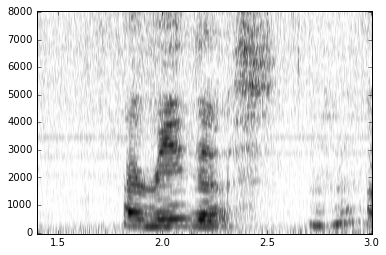

In [5]:
val_clip = 40   # sgram values below val_clip will be set to 0 (white for grey cmap)

print('data_view_extent: ', frdr.data_view_extent)
ax = plt.imshow(
    frdr.sgram,
    aspect='auto',
    interpolation='gaussian',
    extent=frdr.data_view_extent,
    cmap='Greys',
    vmin=val_clip,
    origin='lower'
)

An `.fspec` file also includes total power data for each analysis frame, and the values for the current data_view are accessed through the `power` attribute.

In [6]:
frdr.power.max()

39173.441

There are a number of additional fields provided in the `.fspec` header, and these are listed in the `genhd_fields` attribute.

In [7]:
frdr.genhd_fields

['frmlen',
 'frame_meth',
 'window_type',
 'freq_format',
 'start_time',
 'num_freqs',
 'record_freq',
 'contin',
 'step',
 'start',
 'spec_type',
 'sgram_method',
 'fft_length',
 'sf',
 'pre_emphasis',
 'nan',
 'fft_order']

These header fields are aliased as reader attributes, or more verbosely as subattributes of the reader's `.hdr.genhd` attribute:

In [8]:
print(frdr.fft_length)
print(frdr.hdr.genhd.fft_length)

256
256
